### Importing Libraries and loading dataset:

In [2]:
import pandas as pd
import numpy as np

In [3]:
filepath = "malware_detection_dataset.csv"

In [4]:
df = pd.read_csv(filepath)

### Split the Dataset into X and y

In [6]:
X = df.drop('label',axis=1)
y = df['label']

In [7]:
X

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0.114184,48.0,48.0,0,1,76,1,76,0,0,...,0,0,0,0,0,0,0,1,0,0
1,160.367579,7536.0,0.0,0,24,8208,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.016986,48.0,48.0,0,1,76,1,76,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.003497,0.0,0.0,0,5,212,3,144,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.036724,34.0,311.0,0,1,62,1,339,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046906,0.012744,96.0,96.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1046907,0.012744,96.0,96.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1046908,0.012744,96.0,96.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1046909,0.012744,96.0,96.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

0          benign
1          benign
2          benign
3          benign
4          benign
            ...  
1046906      DDoS
1046907      DDoS
1046908      DDoS
1046909      DDoS
1046910      DDoS
Name: label, Length: 1046911, dtype: object

In [9]:
y.value_counts()

PartOfAHorizontalPortScan     546802
Okiru                         199547
benign                        167208
DDoS                          113977
C&C                            15060
Attack                          3916
C&C-HeartBeat                    324
C&C-Torii                         30
C&C-FileDownload                  28
FileDownload                      12
C&C-HeartBeat-FileDownload         6
C&C-Mirai                          1
Name: label, dtype: int64

###  Dummy values for label:

In [12]:
y=pd.get_dummies(df['label'])

In [13]:
y

,Attack,C&C,C&C-FileDownload,C&C-HeartBeat,C&C-HeartBeat-FileDownload,C&C-Mirai,C&C-Torii,DDoS,FileDownload,Okiru,PartOfAHorizontalPortScan,benign
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1046906,0,0,0,0,0,0,0,1,0,0,0,0
1046907,0,0,0,0,0,0,0,1,0,0,0,0
1046908,0,0,0,0,0,0,0,1,0,0,0,0
1046909,0,0,0,0,0,0,0,1,0,0,0,0


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

### Splitting the X and y Dataset into the Training set and Test set:

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [16]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(837528, 12)
(209383, 12)
(837528, 24)
(209383, 24)


## Normalizing the data:

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(837528, 12)
(209383, 12)
(837528, 24)
(209383, 24)


## Define the model:

In [19]:
CNN_model = Sequential()

## Adding Layers:

In [20]:
CNN_model.add(Dense(2000, activation='relu',input_dim=24))
CNN_model.add(Dense(1500, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(800,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(400,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(150,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(12, activation='softmax'))



## Compiling the Model:

In [21]:
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [22]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              50000     
                                                                 
 dense_1 (Dense)             (None, 1500)              3001500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 800)               1200800   
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 400)               320400    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0

## Training the model

In [23]:
history = CNN_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
6544/6544 [==============================] - 679s 103ms/step - loss: 62.6346 - acc: 0.8600 - val_loss: 0.2719 - val_acc: 0.8742
Epoch 2/10
6544/6544 [==============================] - 646s 99ms/step - loss: 9.9091 - acc: 0.8810 - val_loss: 4.8536 - val_acc: 0.8769
Epoch 3/10
6544/6544 [==============================] - 504s 77ms/step - loss: 1.3089 - acc: 0.8865 - val_loss: 0.2655 - val_acc: 0.8753
Epoch 4/10
6544/6544 [==============================] - 490s 75ms/step - loss: 2.6241 - acc: 0.8928 - val_loss: 0.2660 - val_acc: 0.8777
Epoch 5/10
6544/6544 [==============================] - 419s 64ms/step - loss: 1.0608 - acc: 0.8859 - val_loss: 0.2691 - val_acc: 0.8782
Epoch 6/10
6544/6544 [==============================] - 418s 64ms/step - loss: 94.3940 - acc: 0.8854 - val_loss: 0.2555 - val_acc: 0.8939
Epoch 7/10
6544/6544 [==============================] - 421s 64ms/step - loss: 1.5849 - acc: 0.8845 - val_loss: 0.2644 - val_acc: 0.8790
Epoch 8/10
6544/6544 [================

## Evaluating the model:

In [24]:
testing_results = CNN_model.evaluate(X_test, y_test, batch_size=128)
print("testing loss, testing accuracy:")
print(testing_results)


1636/1636 [==============================] - 19s 11ms/step - loss: 0.2624 - acc: 0.8797
testing loss, testing accuracy:
[0.26243463158607483, 0.879679799079895]


In [25]:
training_results = CNN_model.evaluate(X_train, y_train, batch_size=128)
print("training loss, training accuracy:")
print(training_results)

6544/6544 [==============================] - 76s 12ms/step - loss: 0.2507 - acc: 0.8805
training loss, training accuracy:
[0.25068286061286926, 0.8805055022239685]


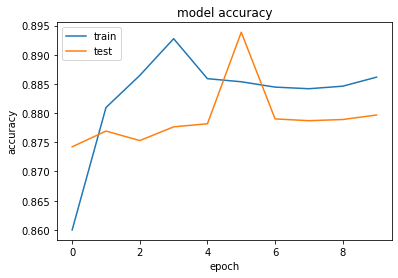

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

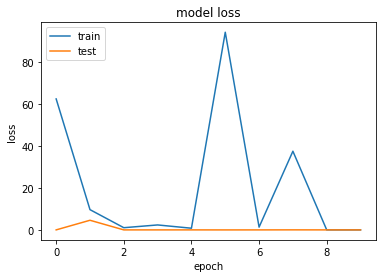

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
##Predict the response for test dataset
CNN_pred=CNN_model.predict(X_test)


6544/6544 [==============================] - 59s 9ms/step


In [30]:
CNN_pred = np.argmax(CNN_pred, axis=1)

In [31]:
y_test = np.resize(y_test, (209383, 12))

In [32]:
y_test=np.argmax(y_test, axis=1)

In [33]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, CNN_pred)
print(cm)

[[   780      0      0      0      0      0      0      0      0      0
       1     22]
 [     4    437      0      0      0      0      0      0      0      0
    1585    954]
 [     2      0      0      0      0      0      0      0      0      0
       0      0]
 [    11      0      0      0      0      0      0      0      0      0
      26     35]
 [     1      0      0      0      0      0      0      0      0      0
       0      0]
 [     0      0      0      0      0      0      0      0      0      0
       1      0]
 [     0      0      0      0      0      0      0      0      0      0
       3      2]
 [     6      0      0      0      0      0      0  22629      0     20
       1      0]
 [     1      0      0      0      0      0      0      0      0      0
       0      0]
 [   133      0      0      0      0      0      0      0      0  39675
      48      1]
 [   152     51      0      0      0      0      0      0      0   3038
  105513    819]
 [   210    217      

In [34]:
### Final Results
from sklearn.metrics import classification_report
print(classification_report(y_test,CNN_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.60      0.97      0.74       803
           1       0.62      0.15      0.24      2980
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       1.00      1.00      1.00     22656
           8       0.00      0.00      0.00         1
           9       0.93      1.00      0.96     39857
          10       0.84      0.96      0.90    109573
          11       0.89      0.45      0.60     33432

    accuracy                           0.88    209383
   macro avg       0.41      0.38      0.37    209383
weighted avg       0.88      0.88      0.86    209383

